## Fitting PDFs for ensembles histograms with error bars

In [15]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("ticks")

import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']


#sns.set(style="white", palette="muted")
#sns.set_context("paper")

### Data import 

In [2]:
data = pd.read_csv("./data/old/small_amp_small_asp.csv")
data.head()

,time,diameter
0,0.0,8.457038
1,6.0,8.530392
2,12.0,8.487853
3,18.0,3.962759
4,18.0,2.250301


#### Loading useful functions from useful_functions.py source file

In [3]:
%load useful_functions.py
from useful_functions import * 

#### Selecting time slice 

In [4]:
d1 = time_slice(data, 18)
print(d1, len(d1[:,1]))

[[18.          3.96275851]
 [18.          2.25030119]
 [18.          4.78834848]
 ...
 [18.          4.65418285]
 [18.          1.59542155]
 [18.          3.71728557]] 265466


#### Computing average heights and error bars for histogram

In [39]:
global_n_bins = 25

heights = ensemble_heights(data=d1[:,1]/2.0, size_per_sample=100000, n_samples=100, n_bins= global_n_bins)

error_d1 = ensemble_error_heights(n_bootstrap=50, data=d1[:,1]/2.0, size_per_sample= 100000, n_samples=100, n_bins= global_n_bins)


## Plotting ensemble averaged histogram with error bars 

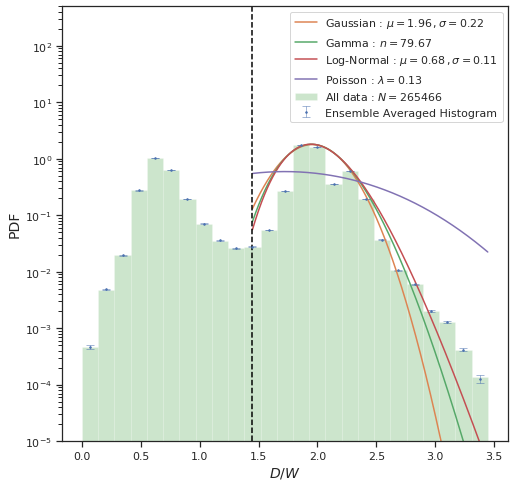

In [46]:
fig = plt.figure(figsize=(8,8))

fit_x, fit_y, xspace = plot_histogram_error(data=d1[:,1]/2.0, n_bins= global_n_bins, heights=heights, errors=error_d1)

# How many points from the tail end, starting from the tail end point, do you want to fit on. max points = 25

limit = 15`

x_lim_test = np.where( xspace >= fit_x[-limit] )

x_lim = x_lim_test[0][1]

popt_gauss , pcov_gauss = fit(fit_x[-limit:],fit_y[-limit:], gauss)
plt.plot(xspace[x_lim:], gauss(xspace[x_lim:], *popt_gauss), label="Gaussian : $\mu = %.2f \, ,  \sigma = %.2f$" %(popt_gauss[0], popt_gauss[1]) ); 

popt_gamma, pcov_gamma = fit(fit_x[-limit:], fit_y[-limit:], gamma_n)
plt.plot(xspace[x_lim:], gamma_n(xspace[x_lim:], *popt_gamma), label="Gamma : $n = %.2f$" %(popt_gamma[0])); 

popt_lognorm, pcov_lognorm = fit(fit_x[-limit:], fit_y[-limit:], lognorm)
plt.plot(xspace[x_lim:], lognorm(xspace[x_lim:], *popt_lognorm), label="Log-Normal : $\mu = %.2f \, , \sigma = %.2f$" %(popt_lognorm[0], popt_lognorm[1])); 

popt_poisson, pcov_poisson = fit(fit_x[-limit:], fit_y[-limit:], poisson)
plt.plot(xspace[x_lim:], poisson(xspace[x_lim:], *popt_poisson), label="Poisson : $\lambda = %.2f$" %popt_poisson[0]); 

plt.axvline(x = fit_x[-limit], color = 'black', linestyle='--')

plt.hist(d1[:,1]/2.0, alpha = 0.2, color= 'green', bins=bin_selection(d1[:,1]/2.0, global_n_bins)[0], density=True, label = "All data : $N = %d$" %(np.size(d1[:,1]/2.0)))

plt.ylim(top = 5e2, bottom = 1e-5);
plt.yscale('log', basey = 10);
plt.legend();



$y = A e^{-n x^m}$

3.1638835787235786 3.494603250890293 
 0.15772380575089703


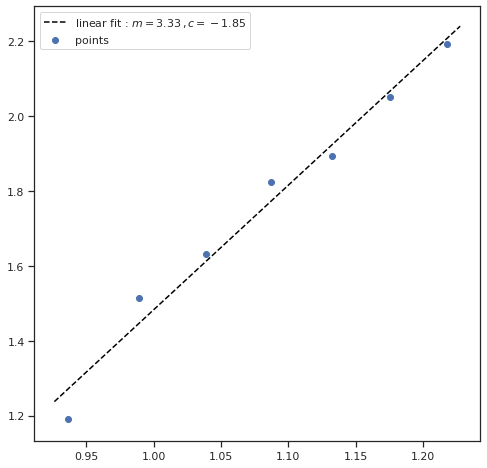

In [44]:
new_limit = 7

X = np.log(fit_x[-new_limit:])
Y = np.log(-1.0 * np.log(fit_y[-new_limit:]))

log_xspace = np.linspace(np.amin(X)- 1e-2 , np.amax(X)+1e-2, 1000)

popt_linear , pcov_linear = fit(X,Y, linear)


fit_error = np.sqrt(np.diag(pcov_linear))

standard_fit_error = fit_error[0]/np.sqrt(new_limit)

bound_1 = popt_linear[0] - 1.96 * standard_fit_error
bound_2 = popt_linear[0] + 1.96 * standard_fit_error

print(bound_1, bound_2, "\n", np.exp(popt_linear[1]))

plt.figure(figsize=(8,8))
plt.scatter(X,Y,label="points");
plt.plot(log_xspace, linear(log_xspace, *popt_linear), linestyle = '--', color = 'black',  label="linear fit : $m = %.2f \, , c = %.2f$" %(popt_linear[0], popt_linear[1]));
plt.legend();

#### Things to do : 
- Linear regression on double log scales
- Null-hypothesis testing on double log scale slopes
- Repeat for above steps for different time slices